In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
from scipy import stats

import os
import csv
import datetime
import math

import matplotlib.pyplot as plt
import seaborn as sns
from ptitprince import PtitPrince as pt


from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
'''
/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: 
The `IPython.html` package has been deprecated since IPython 4.0. 
You should import from `notebook` instead. 
`IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
'''

import random as rd
import math
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

/Users/arataNonami/opt/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def read_csv(filename):
    a = pd.read_csv(filename, header=None)
    a = a.transpose()
    a.columns =  ['option_left','option_middle','option_right', 'prob_left','prob_middle','prob_right','choice','hit_or_blow','sum_score', 'rt']
    return a
def str2option(str_table):
    ret = []
    for i in range(len(str_table)):
        ret.append(np.array(str_table[i].split(",")).astype(int))
    return ret
def str2bool(str_arr):
    ret = []
    for i in range(len(str_arr)):
        if(str_arr[i] == "TRUE" or str_arr[i] == "true"):
            ret.append(True)
        else:
            ret.append(False)
    return ret
def compare(a,b):
    # both a, b should be np.array
    diff = a-b
    if ((diff >= [0,0,0]).all()):
        return "left_is_bigger"
    if ((diff <= [0,0,0]).all()):
        return "right_is_bigger"
    return "these_are_comparable"
def if_competitive(a,b,c):
    # if return is True, it means a participant (or an agent) will have to think which feature is better used
    # if return is False, it means one of these options is superior to the others
    aa = np.array(a)
    bb = np.array(b)
    cc = np.array(c)
    if (compare(aa,bb) == "these_are_comparable"):
        if(compare(aa,cc)=="right_is_bigger" and compare(bb,cc)=="right_is_bigger"):
            return False
        else:
            return True
    if(compare(aa,bb) == "right_is_bigger"):
        if(compare(bb,cc)=="these_are_comparable"):
            return True
        else:
            return False
    if(compare(aa,bb) == "left_is_bigger"):
        if(compare(aa,cc)=="these_are_comparable"):
            return True
        else:
            return False

filename1 = "../data/test/takasi_test_20191112.csv"
filename2 = "../data/test/yn_test_20191113.csv"
filename3 = "../data/test/arata_test_20191112.csv"
filename4 = "../data/test/jinno_test_20191111.csv" #使っているcsvが違っているため、不適切
filename5 = "../data/test/arata_test_20191118.csv" #comparableの出現回数を調整。85%にした。
filename6 = "../data/test/shinobu_test_20191118.csv"
filename7 = "../data/test/naru_test_20191118.csv"
a = read_csv(filename7)
print(a.describe())
a['option_left_str'] = a.option_left
a['option_middle_str']  = a.option_middle
a['option_right_str']  = a.option_right
a.option_left = str2option(a.option_left)
a.option_middle = str2option(a.option_middle)
a.option_right = str2option(a.option_right)
a.prob_left = a.prob_left.astype(float)/100.0
a.prob_middle = a.prob_middle.astype(float)/100.0
a.prob_right = a.prob_right.astype(float)/100.0
a.hit_or_blow = str2bool(a.hit_or_blow)
a.sum_score = a.sum_score.astype(int)
a.rt = a.rt.astype(float)

print(a.describe())
a.describe()

       option_left option_middle option_right prob_left prob_middle  \
count          300           300          300       299         299   
unique           8             8            8        93          92   
top          1,0,1         1,0,1        1,0,0         0           0   
freq            62            54           49        35          40   

       prob_right  choice hit_or_blow sum_score                  rt  
count         299     300         300       300                 300  
unique         89       3           2       206                 300  
top             0  middle        true      2060  1039.5700000007637  
freq           44     116         206         9                   1  
        prob_left  prob_middle  prob_right    sum_score            rt
count  299.000000   299.000000  299.000000   300.000000    300.000000
mean     0.446756     0.448161    0.435886  1101.633333   2976.768483
std      0.335029     0.332727    0.331520   594.129868   4105.940086
min      0.000

,prob_left,prob_middle,prob_right,sum_score,rt
count,299.000000,299.000000,299.000000,300.000000,300.000000
mean,0.446756,0.448161,0.435886,1101.633333,2976.768483
std,0.335029,0.332727,0.331520,594.129868,4105.940086
min,0.000000,0.000000,0.000000,10.000000,149.800000
25%,0.140000,0.120000,0.140000,607.500000,986.011250
50%,0.420000,0.410000,0.370000,1165.000000,1592.940000
75%,0.760000,0.750000,0.725000,1600.000000,3080.760000
max,1.000000,1.000000,1.000000,2060.000000,32052.970000


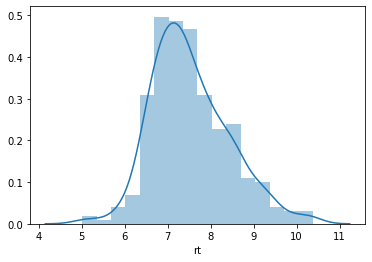

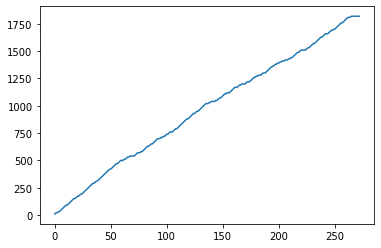

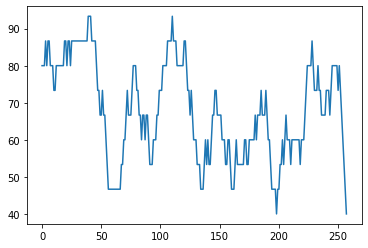

In [3]:
plt.figure()
sns.distplot(np.log(a.rt))
plt.figure()
#aa = a.query('prob_left < .9 and prob_middle < .9 and prob_right < .9')
aa = a#.query('option_left_str != "1,1,1" and option_middle_str != "1,1,1" and option_right_str != "1,1,1"')
#aa = aa.query('')
new_sum_score = []
new_hit_or_blow = []
s = 0
for i in aa.hit_or_blow.index:
    left = aa.option_left[i]
    middle = aa.option_middle[i]
    right = aa.option_right[i]
    if ( if_competitive(left,middle,right)):
        if (aa.hit_or_blow[i]):
            s += 10
            new_hit_or_blow.append(10)
        else:
            new_hit_or_blow.append(0)
        new_sum_score.append(s)

sns.lineplot(range(len(new_sum_score)), new_sum_score)

ave_hit_rate = []
n =15
for i in range(len(new_hit_or_blow)-n):
    ave_hit_rate.append(sum(new_hit_or_blow[i:i+n]) / n*10)
plt.figure()
sns.lineplot(range(len(ave_hit_rate)),ave_hit_rate)


In [4]:
a.option_left[1][0] == 1 and a.option_left[1][1] == 1 and a.option_left[1][2] == 1
(a.option_left[1] ==[1,1,1]).all()

False

In [5]:
t = np.array([1,2,1])
u = np.array([1,1,2])

print([1,2,1] > [1,1,2])
print(t - u)
print((t  >= [1,1,1]).all())

True
[ 0  1 -1]
True


In [6]:
def compare(a,b):
    # both a, b should be np.array
    diff = a-b
    if ((diff >= [0,0,0]).all()):
        return "left_is_bigger"
    if ((diff <= [0,0,0]).all()):
        return "right_is_bigger"
    return "these_are_comparable"

In [7]:
#explorations
def get_file_name(path):
    files = []
    for filename in os.listdir(path):
        files.append(os.path.join(path, filename))
    return sorted(sorted(files))

filename6 = "../data/test/shinobu_test_20191118.csv"
def read_logfile(filename=filename6):
    a = read_csv(filename)
    #print(a.describe())
    a['option_left_str'] = a.option_left
    a['option_middle_str']  = a.option_middle
    a['option_right_str']  = a.option_right
    a.option_left = str2option(a.option_left)
    a.option_middle = str2option(a.option_middle)
    a.option_right = str2option(a.option_right)
    a.prob_left = a.prob_left.astype(float)/100.0
    a.prob_middle = a.prob_middle.astype(float)/100.0
    a.prob_right = a.prob_right.astype(float)/100.0
    a['best_option'] = get_best_exp_option(a.prob_left, a.prob_middle, a.prob_right)
    a.hit_or_blow = str2bool(a.hit_or_blow)
    a.sum_score = a.sum_score.astype(int)
    a.rt = a.rt.astype(float)
    return a
def get_best_exp_option(prob_ls, prob_ms, prob_rs):
    ret = []
    for i in range(len(prob_ls)):
        ret.append(get_best_exp_option0(prob_ls[i], prob_ms[i], prob_rs[i]))
    return ret
def get_best_exp_option0(prob_l, prob_m, prob_r):
    if(prob_l >= prob_m and prob_l>=prob_r):
        return "left"
    if(prob_m >= prob_l and prob_m>=prob_r):
        return "middle"
    if(prob_r >= prob_l and prob_r>=prob_m):
        return "right"

def plot(filename=filename6, n4ave=10):
    a = read_logfile(filename)
    plt.subplot(2,2,1)
    g = sns.distplot(a.rt)
    #g.set(xlim=(0,3), ylim=(0,30))
    
    #aa = a.query('prob_left < .9 and prob_middle < .9 and prob_right < .9')
    aa = a#.query('option_left_str != "1,1,1" and option_middle_str != "1,1,1" and option_right_str != "1,1,1"')
    #aa = aa.query('')
    new_sum_score = []
    new_hit_or_blow = []
    s = 0
    for i in aa.hit_or_blow.index:
        left = aa.option_left[i]
        middle = aa.option_middle[i]
        right = aa.option_right[i]
        if ( if_competitive(left,middle,right)):
            if (aa.hit_or_blow[i]):
                s += 10
                new_hit_or_blow.append(10)
            else:
                new_hit_or_blow.append(0)
            new_sum_score.append(s)
            
    plt.subplot(2,2,2)
    sns.lineplot(range(len(new_sum_score)), new_sum_score)
    print(len(new_sum_score))
    plt.subplot(2,2,3)
    ave_hit_rate = []
    n =n4ave #number of trials to calc average
    for i in range(len(a.hit_or_blow)-n):
        ave_hit_rate.append(sum(a.hit_or_blow[i:i+n]) / n*100) 
    g = sns.lineplot(range(len(ave_hit_rate)),ave_hit_rate)
    #g.set(ylim=(20,100))
    g.set_xticks(np.linspace(0, 300, 31), minor=True)  #---------------------
    g.set_yticks(np.linspace(20,100,17), minor=True)
    g.grid(color='darkgray', linestyle='-', linewidth=0.3, which='both')
    
    plt.subplot(2,2,4)
    correct_choice = []
    #for i in range(len(a.best_option)):
    #    correct_choice.append(a.best_option[i] == a.choice)
    correct_choice = (a.best_option == a.choice)
    ave_correct_choice = []
    for i in range(len(correct_choice)-n):
        ave_correct_choice.append(sum(correct_choice[i:i+n]) / n*100)
    g4 = sns.lineplot(range(len(ave_correct_choice)),ave_correct_choice)
    g4.set(ylim=(20,100))
    g4.set_xticks(np.linspace(0, 300, 31), minor=True)  #---------------------
    g4.set_yticks(np.linspace(20,100,17), minor=True)
    g4.grid(color='darkgray', linestyle='-', linewidth=0.3, which='both')
    return

#print(new_sum_score[len(new_sum_score)-1])
file = get_file_name('../data/test')    #('rate')
interact(plot, filename = widgets.RadioButtons(options=file, value=file[5]),
        n4ave = widgets.IntSlider(min=1, max=30, step=1, value=15))

interactive(children=(RadioButtons(description='filename', index=5, options=('../data/test/.DS_Store', '../dat…

<function __main__.plot(filename='../data/test/shinobu_test_20191118.csv', n4ave=10)>

log/15.csv

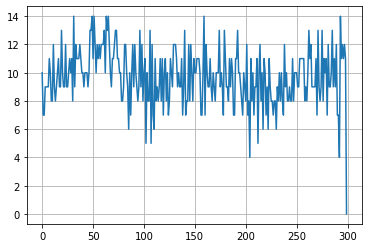

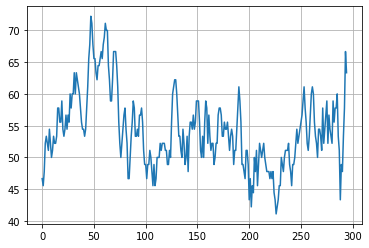

In [24]:
files = get_file_name('log')  
sums = np.zeros(300)
for file in files:
    print("\r{}".format(file), end="")
    if(file[0] == '.'):
        continue
    filename = file
    n4ave=10
    a = read_logfile(filename)
    aa = a
    new_sum_score = []
    new_hit_or_blow = []
    s = 0
    for j in aa.hit_or_blow.index:
        left = aa.option_left[i]
        middle = aa.option_middle[i]
        right = aa.option_right[i]
        if ( if_competitive(left,middle,right) ):
            if (aa.hit_or_blow[i]):
                s += 10
                new_hit_or_blow.append(10)
            else:
                new_hit_or_blow.append(0)
            new_sum_score.append(s)
            
    ave_hit_rate = []
    n =5 #number of trials to calc average
    for i in range(len(a.hit_or_blow)-n):
        ave_hit_rate.append(sum(a.hit_or_blow[i:i+n]) / n*100) 
    
    correct_choice = []
    #for i in range(len(a.best_option)):
    #    correct_choice.append(a.best_option[i] == a.choice)
    correct_choice = (a.best_option == a.choice)
    ave_correct_choice = []
    for i in range(len(correct_choice)-n):
        ave_correct_choice.append(sum(correct_choice[i:i+n]) / (n+1)*100)
    #print(correct_choice*np.ones(300))
    sums = sums + correct_choice*np.ones(300)
    #print(sums)
plt.grid()
plt.plot(sums)
ave_hit_rate = []
n = 5 #number of trials to calc average
ave_sums = sums/15
for i in range(len(sums)-n):
    ave_hit_rate.append(sum(ave_sums[i:i+n]) / (n+1)*100) 
plt.figure()
plt.grid()
plt.plot(ave_hit_rate)
#sns.lineplot(range(300), s)